In [207]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time
import sys
from iminuit import Minuit, describe


In [208]:
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile

In [209]:
fname = r"/data/new_trap/20190715/NoBead/X350_Y200.h5" 
bd = BeadDataFile.BeadDataFile(fname)
time = np.arange(0,len(bd.quad_sum)-1,1)
time_sub = np.arange(3501,4000)

In [210]:
check = []
subset = []
for i in range(0,len(bd.quad_sum)-1):
    check.append(bd.quad_sum[i+1]-bd.quad_sum[i])
    if(i>3500 and i<4000):
        subset.append(bd.quad_sum[i+1]-bd.quad_sum[i])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in int_scalars
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in int_scalars
  


(3500, 4000)

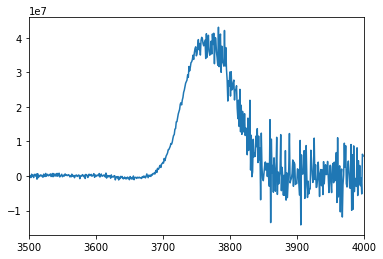

In [211]:
plt.plot(time_sub,subset)
plt.xlim(3500,4000)

(3500, 4000)

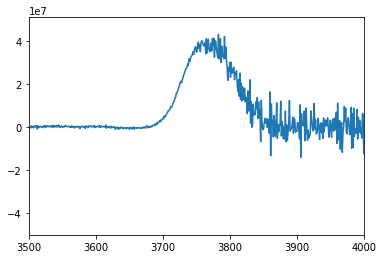

In [212]:
plt.plot(time,check)
plt.xlim(3500,4000)

In [213]:
def gaussian(x,area,mean,sigma,constant):
    norm = (1/((1/2*sigma)*np.sqrt(np.pi * 2)))
    return area * norm * np.exp(-(np.subtract(x,mean)**2/(2*sigma**2)))+constant


def chisquare_1d(area,mean,sigma,constant):
    return np.sum(np.power(np.divide(np.subtract(gaussian(data_x,area,mean,sigma,constant),data_y),data_y_error),2))



In [229]:
data_x = time
data_y = check
data_y_error = np.sqrt(np.abs(check))

In [230]:
m=Minuit(chisquare_1d, 
         area = 410e7,
         #limit_area=(0+0.001,60*24),
         #fix_area = "True",
         mean = 3650,
         #fix_mean = "True",
         limit_mean = (3500,4500),
         sigma = 150,
         #limit_R2 = (0.08,0.50),
         constant = 0,
         fix_constant=0,
         errordef = 1,
         print_level=1)
print('Now proceed with the fit.')
m.migrad(ncall=50000)



/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: InitialParamWarning: Parameter area is floating but does not have initial step size. Assume 1.
  del sys.path[0]
/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: InitialParamWarning: Parameter mean is floating but does not have initial step size. Assume 1.
  del sys.path[0]
/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: InitialParamWarning: Parameter sigma is floating but does not have initial step size. Assume 1.
  del sys.path[0]


Now proceed with the fit.
------------------------------------------------------------------
| FCN = 6.797E+10               |     Ncalls=727 (727 total)     |
| EDM = 0.00341 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


------------------------------------------------------------------
| FCN = 6.797E+10               |     Ncalls=727 (727 total)     |
| EDM = 0.00341 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
----------------------------------------------------------------------------------------------
|   | Name     |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
----------------------------------------------------------------------------------------------
| 0 | area     |  1.605E9  |  0.000E9  |            |            |         |         |       |
| 1 | mean     |  0.377E4  |  0.000E4  |            |            |  3500   |  4500   |       |
| 2 | sigma    |  2.928E1  |  0.000E1  |            |            |         |         |       |
| 3 | constant |  -278.2   |    1.4    |            |            |         |         |       |
----------------------------------------------------------------------------------------------

(3500, 4000)

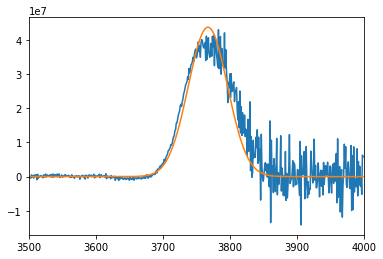

In [231]:
plt.plot(time_sub,subset)
plt.plot(time_sub,gaussian(time_sub,m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]))
plt.xlim(3500,4000)

(3500, 4000)

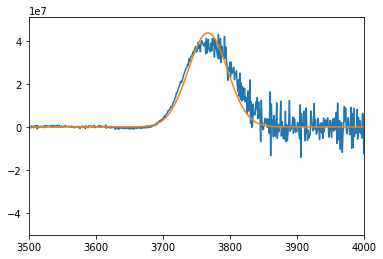

In [232]:
plt.plot(time,check)
plt.plot(time,gaussian(time,m.values["area"],m.values["mean"],m.values["sigma"],m.values["constant"]))
plt.xlim(3500,4000)